In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
X = df.drop(columns=['Strength'])
Y = df.iloc[:,-1]

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 , random_state=50)

In [10]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [11]:
Y_pred = lr.predict(X_test)
r2_score(Y_test,Y_pred)

0.6359646484072214

In [12]:
# cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,Y,scoring='r2'))

np.float64(0.46099404916628683)

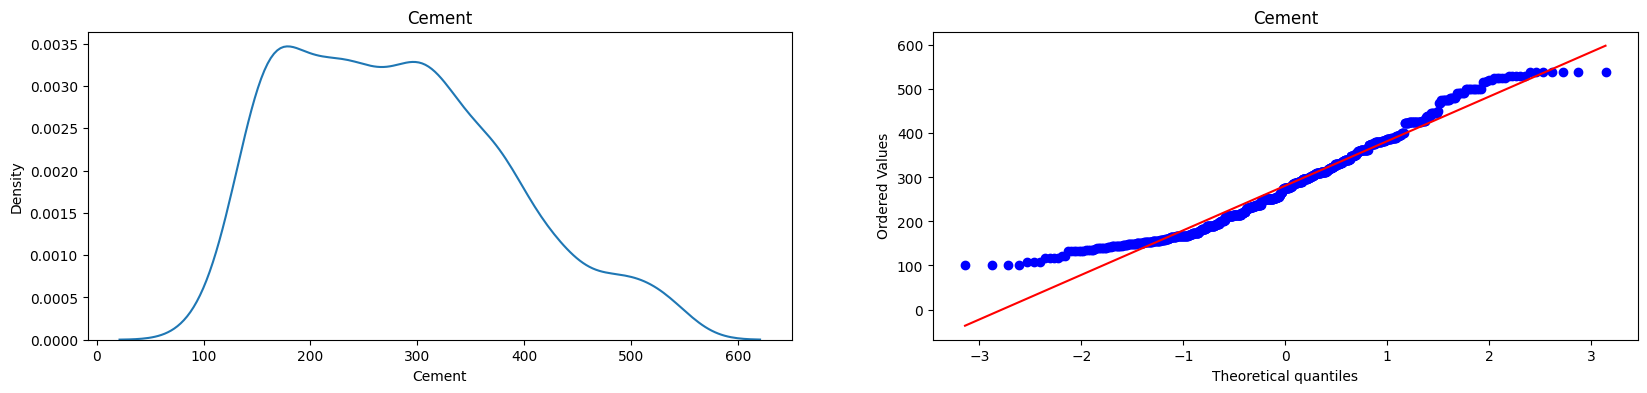

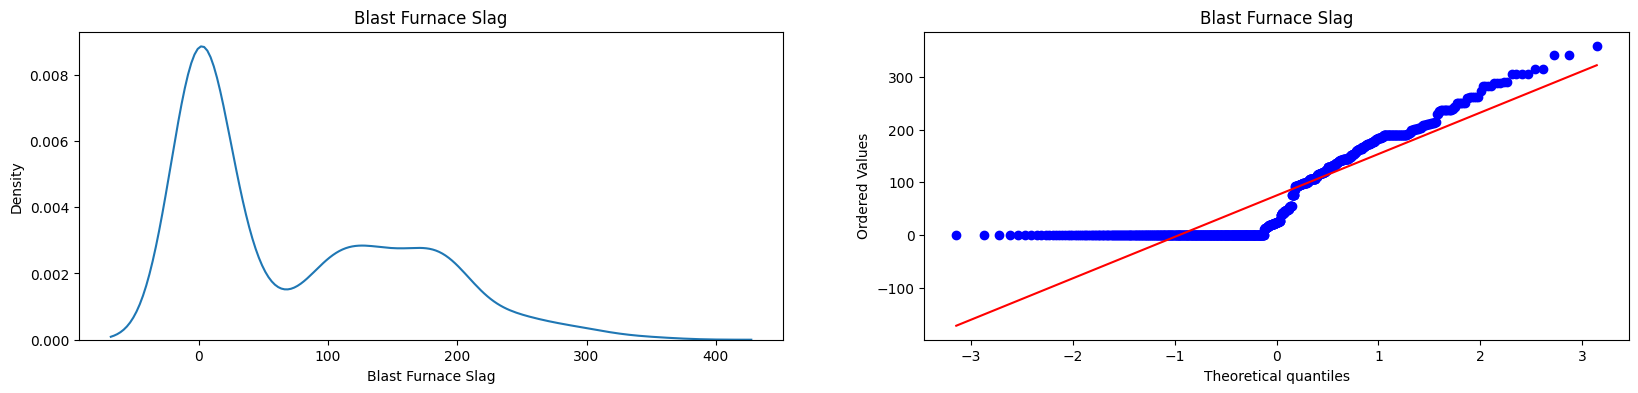

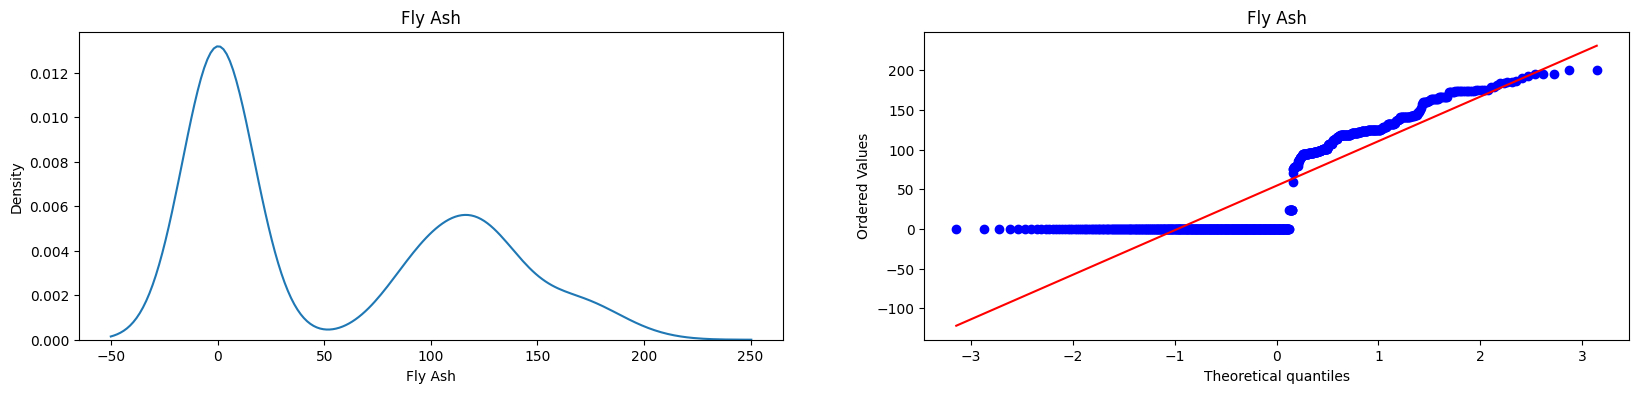

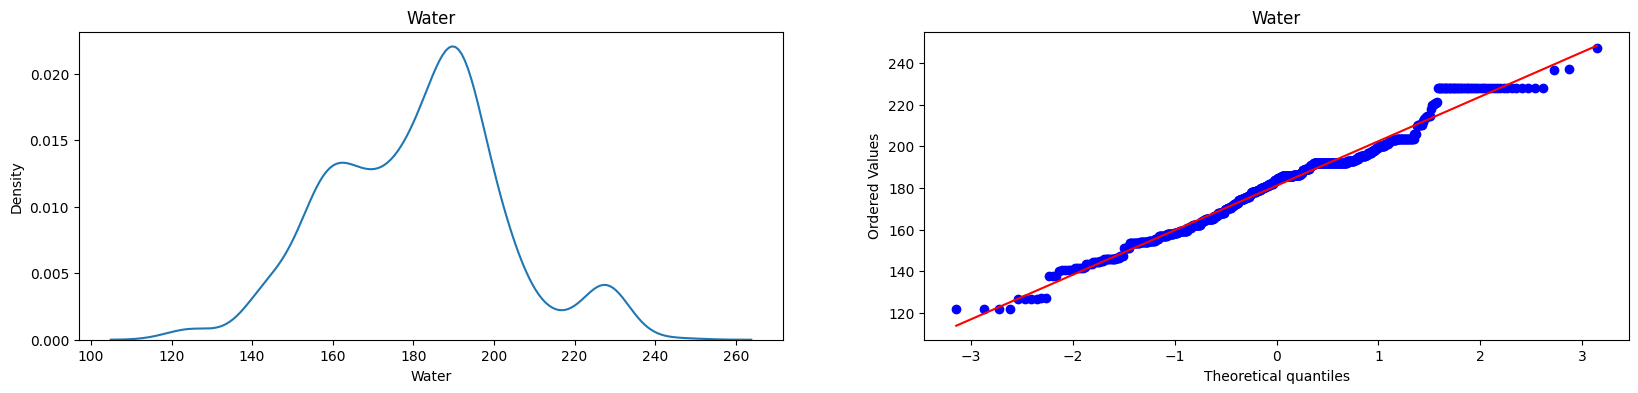

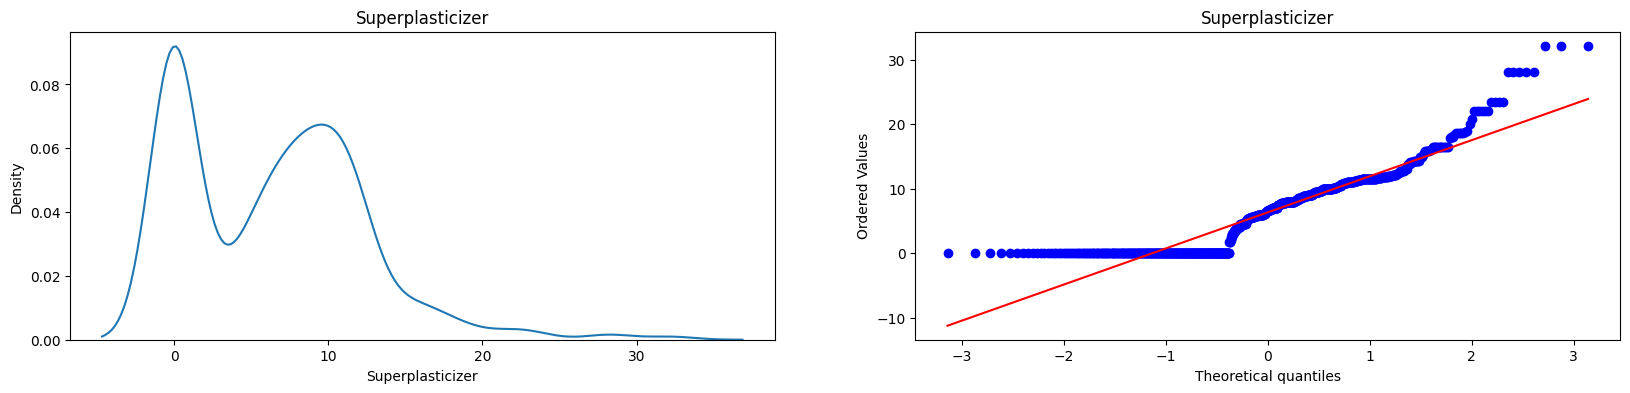

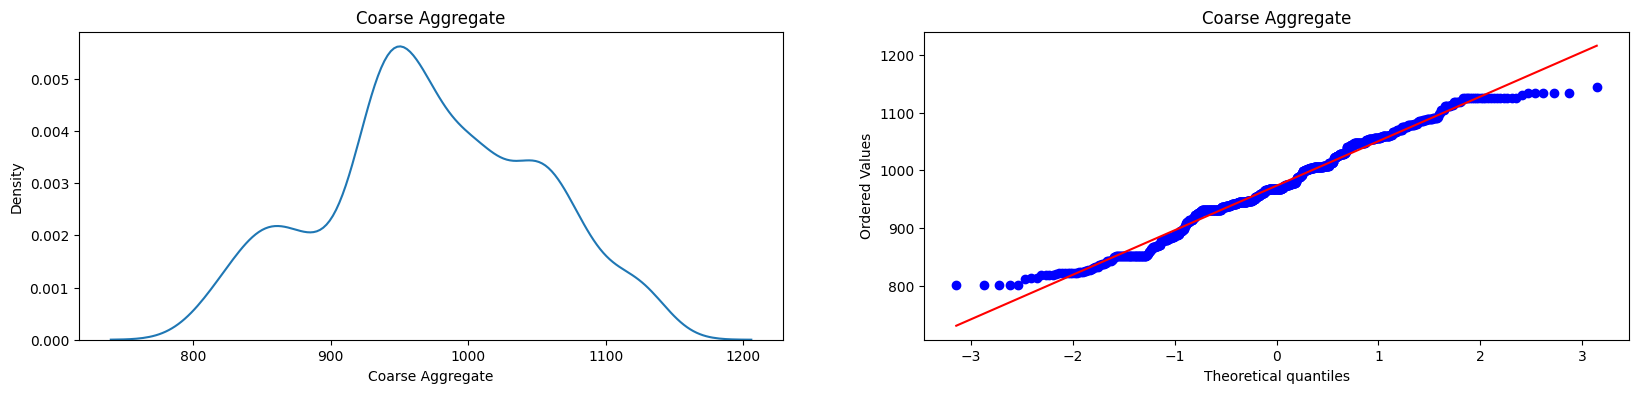

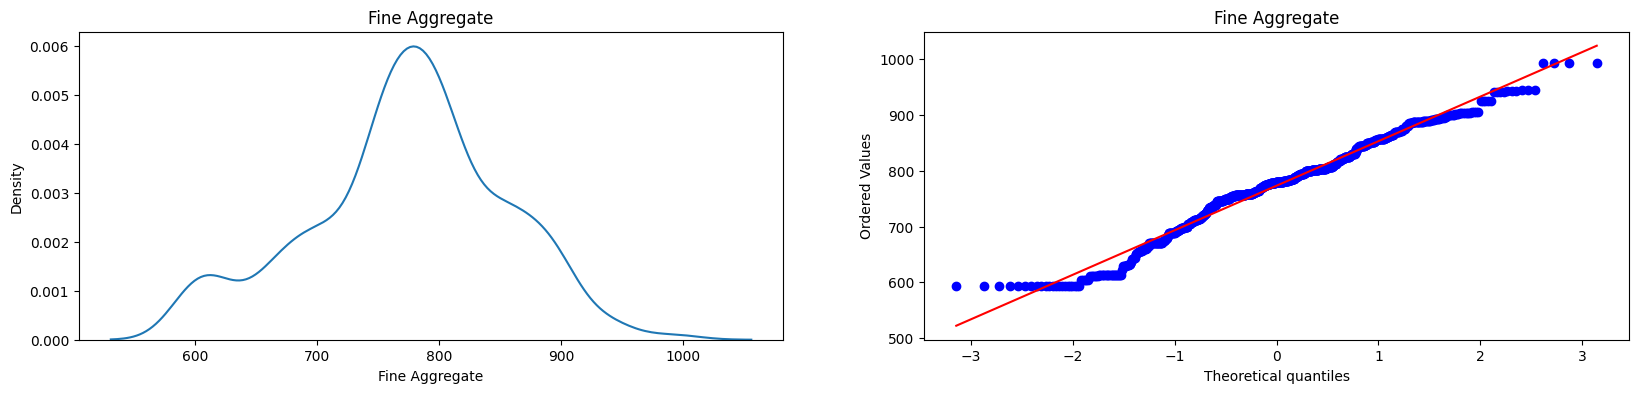

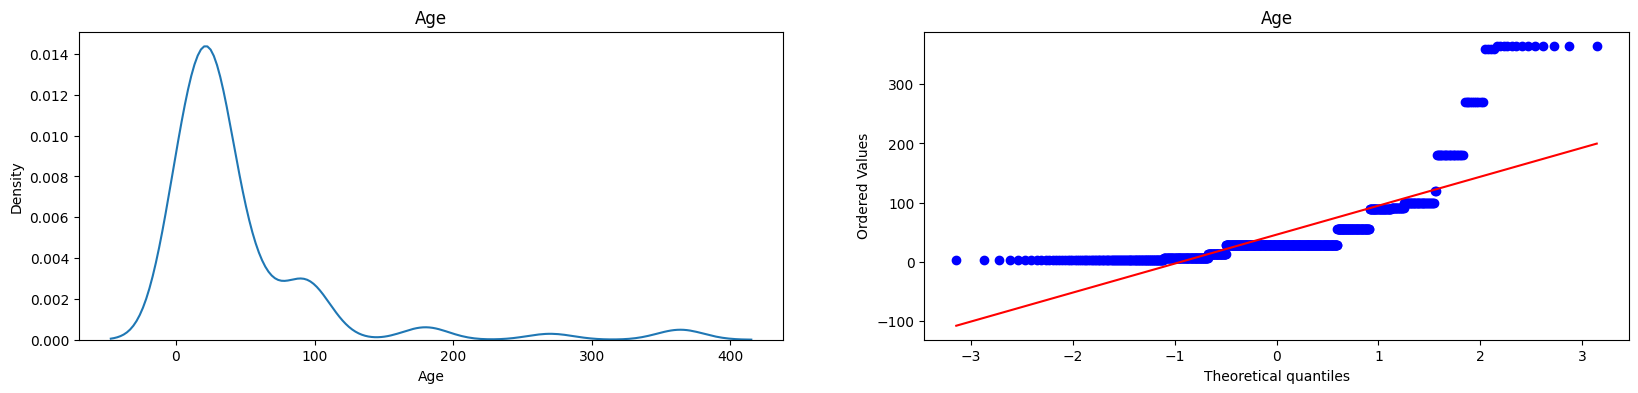

In [19]:
for col in X_train.columns:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col] , dist='norm' , plot=plt)
    plt.title(col)

    plt.show()



In [21]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train+0.00001)
X_test_transformed = pt.fit_transform(X_test+0.00001)

pd.DataFrame({'cols' : X_train.columns , 'box-cox lamdas' : pt.lambdas_})

,cols,box-cox lamdas
0,Cement,0.053029
1,Blast Furnace Slag,0.011470
2,Fly Ash,-0.036598
3,Water,1.038904
4,Superplasticizer,0.057597
5,Coarse Aggregate,1.306063
6,Fine Aggregate,1.954884
7,Age,0.057004


In [22]:
lr = LinearRegression()
lr.fit(X_train_transformed,Y_train)

y_pred2 = lr.predict(X_test_transformed)
r2_score(Y_test,y_pred2)

0.7984988587522848

In [37]:
# using cross val score
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.00001)
lr = LinearRegression()

np.mean(cross_val_score(lr,X_transformed,Y,scoring='r2'))

np.float64(0.6668489654022178)

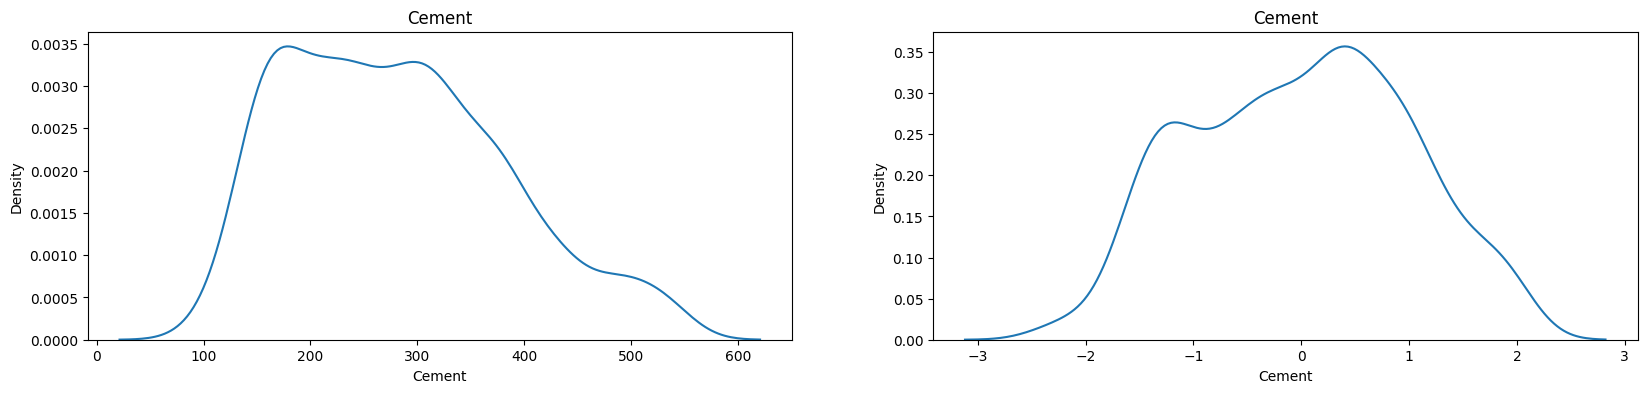

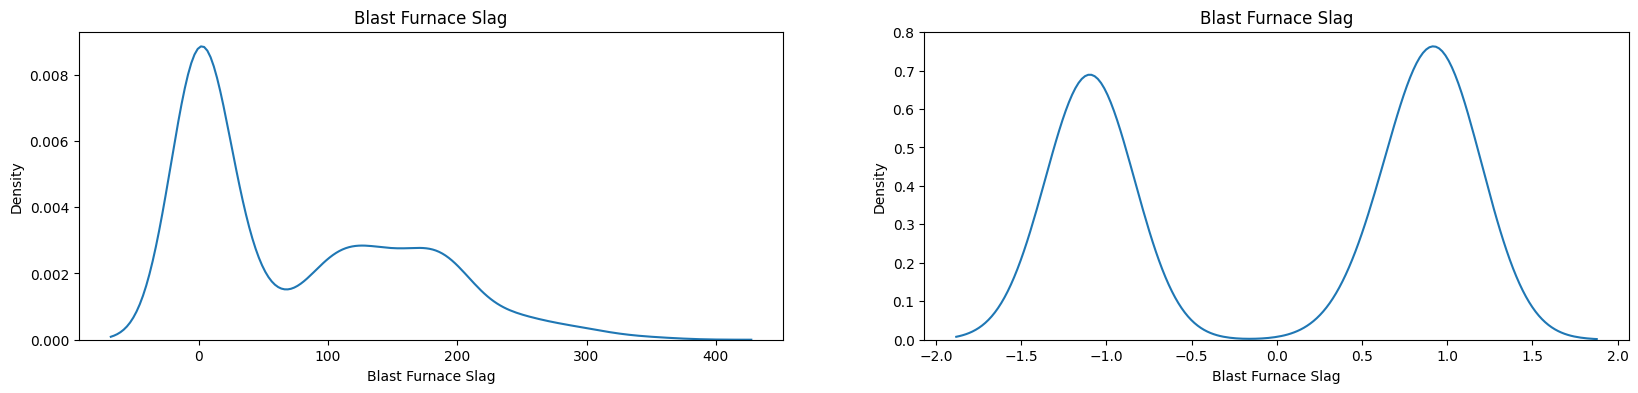

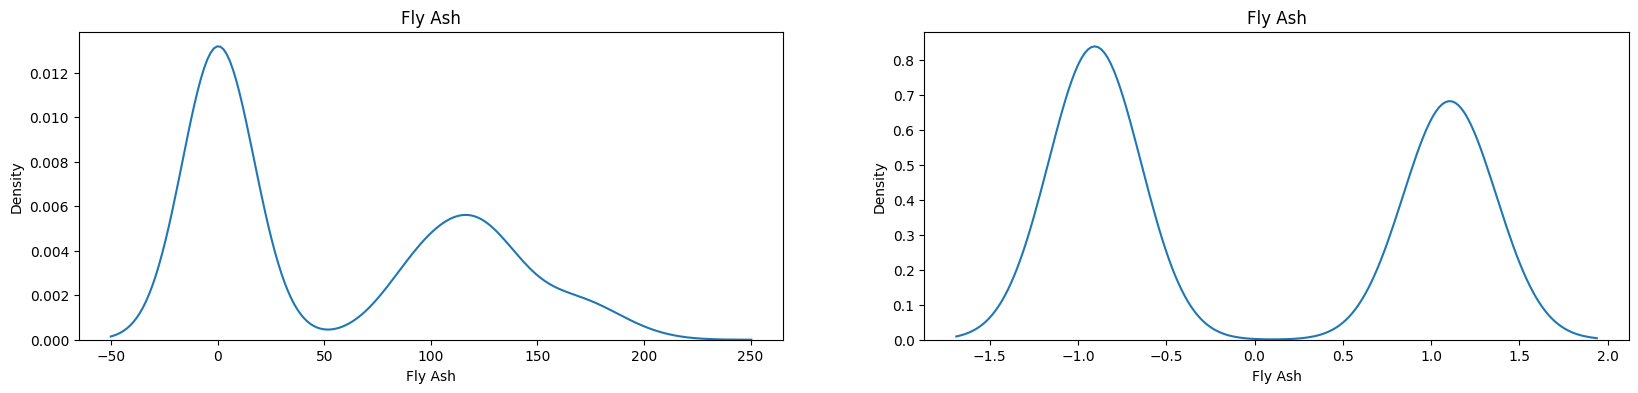

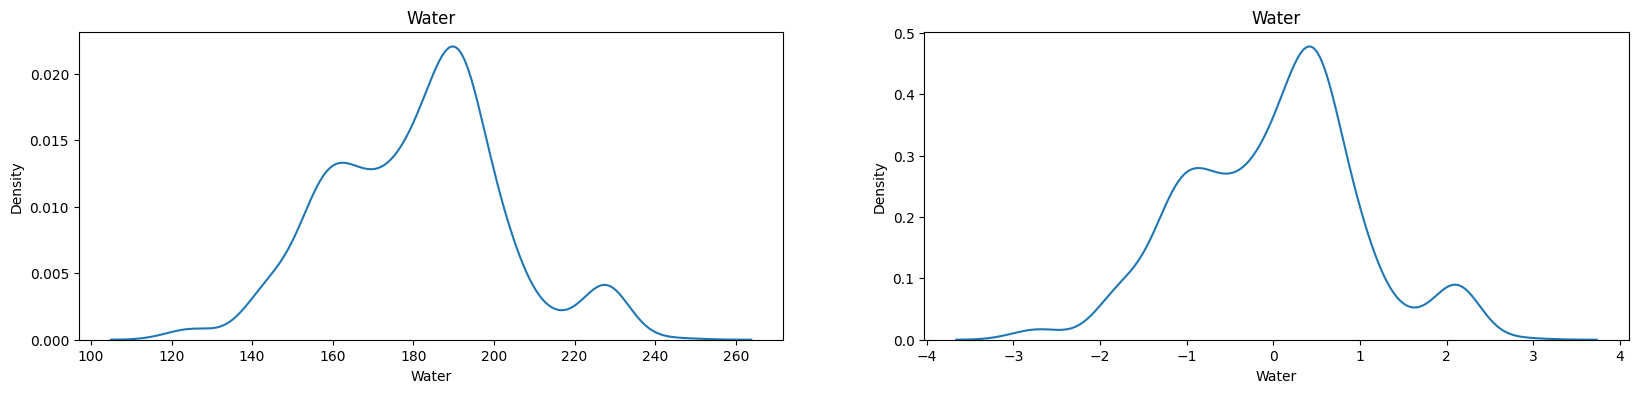

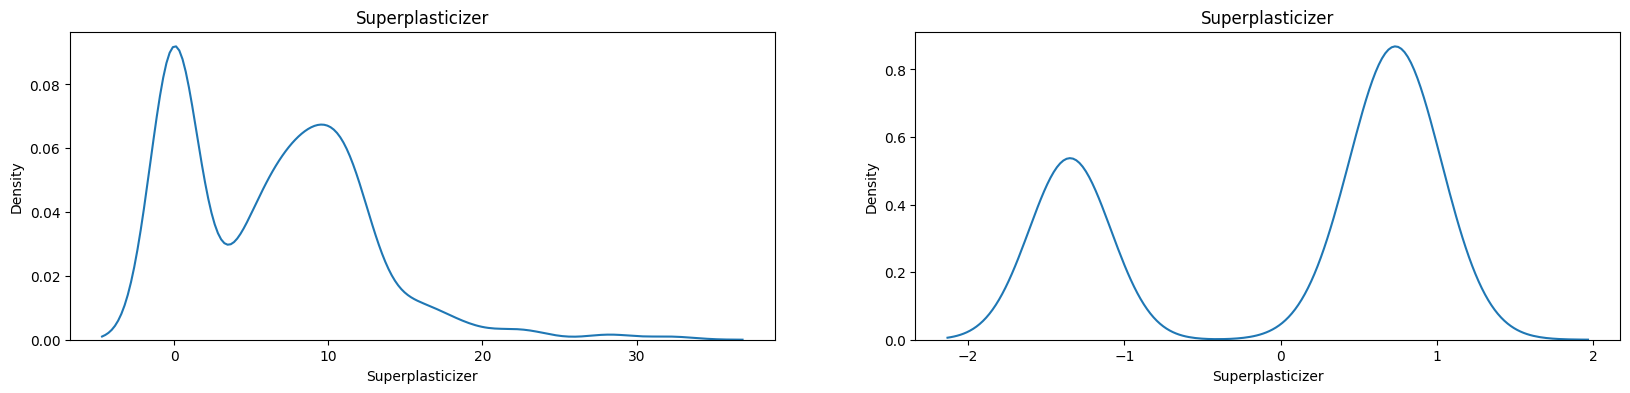

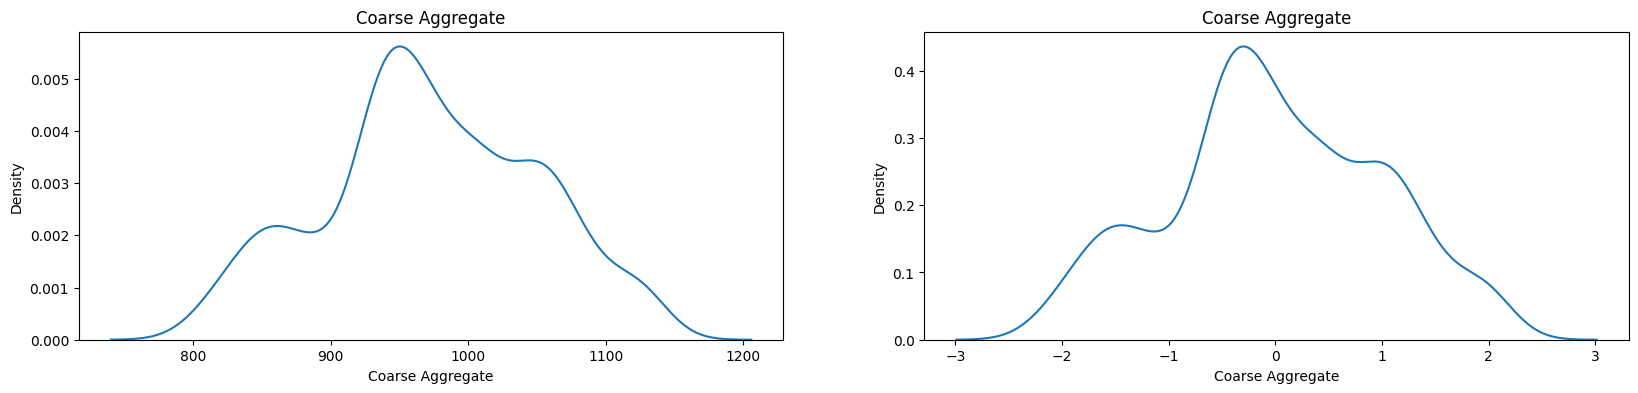

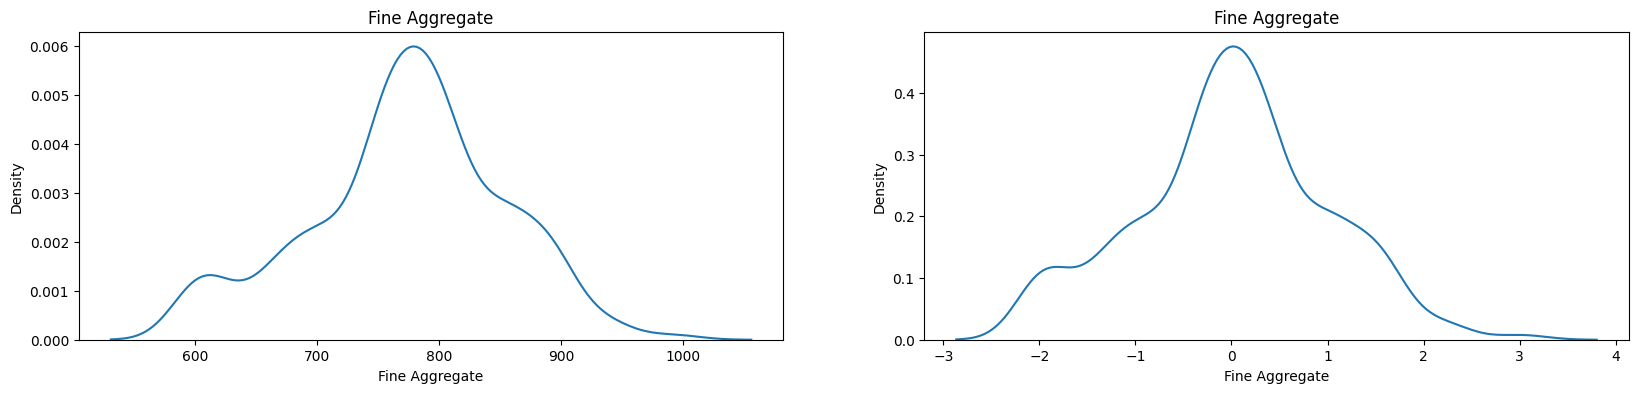

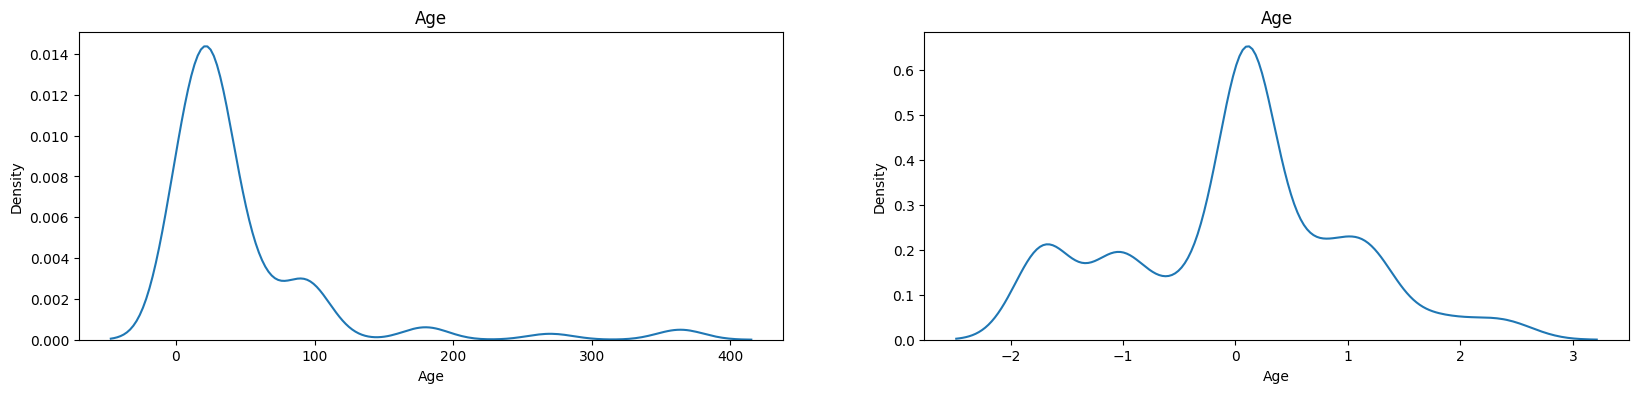

In [27]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train_transformed.columns:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    plt.title(col)

    plt.show()



In [35]:
pt1 = PowerTransformer()
X_train_transformed2 = pt1.fit_transform(X_train+0.00001)
X_test_transformed2 = pt1.fit_transform(X_test+0.00001)



lr = LinearRegression()
lr.fit(X_train_transformed2,Y_train)

y_pred3 = lr.predict(X_test_transformed2)
r2_score(Y_test,y_pred3)


# pd.DataFrame({'cols' : X_train.columns , 'box-cox lamdas' : pt.lambdas_})

0.8033350941321638

In [31]:
# using cross val score
pt = PowerTransformer()
X_transformed = pt.fit_transform(X+0.00001)
lr = LinearRegression()

np.mean(cross_val_score(lr,X_transformed,Y,scoring='r2'))

np.float64(0.6834625866189683)

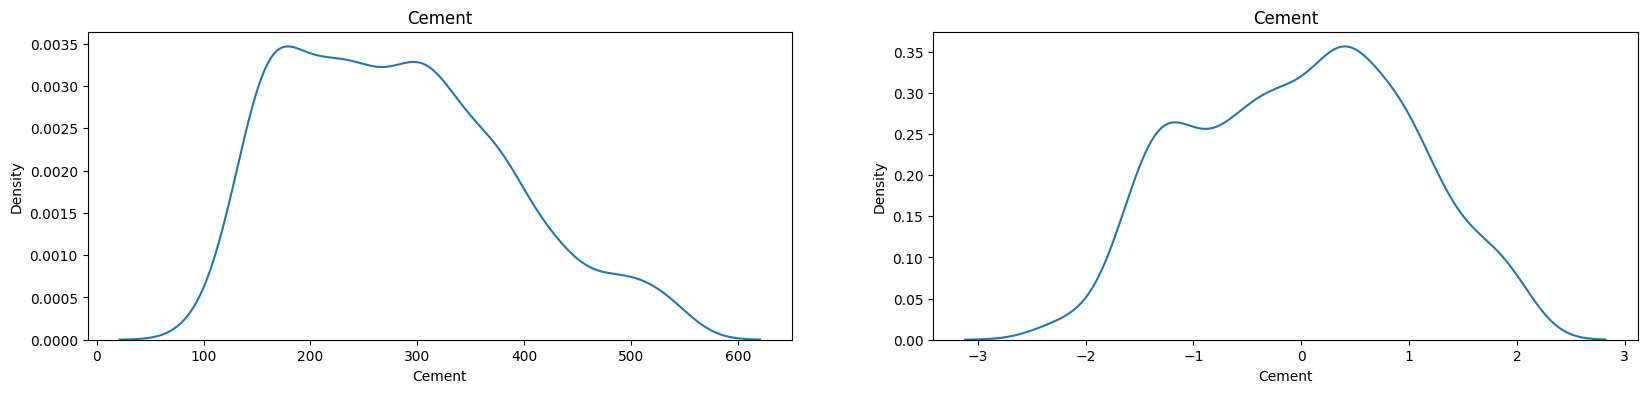

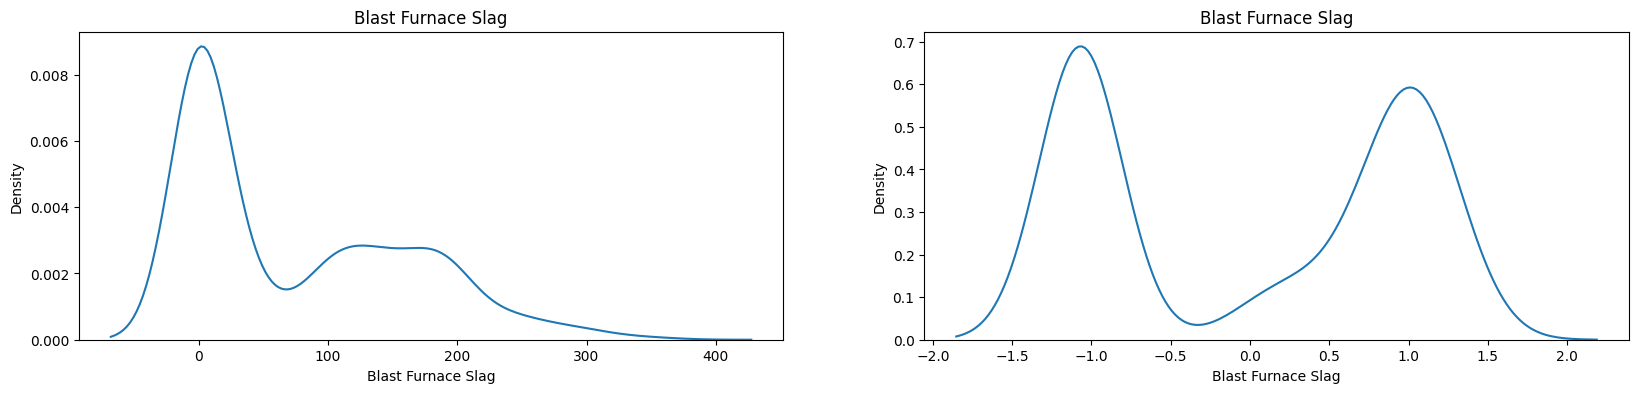

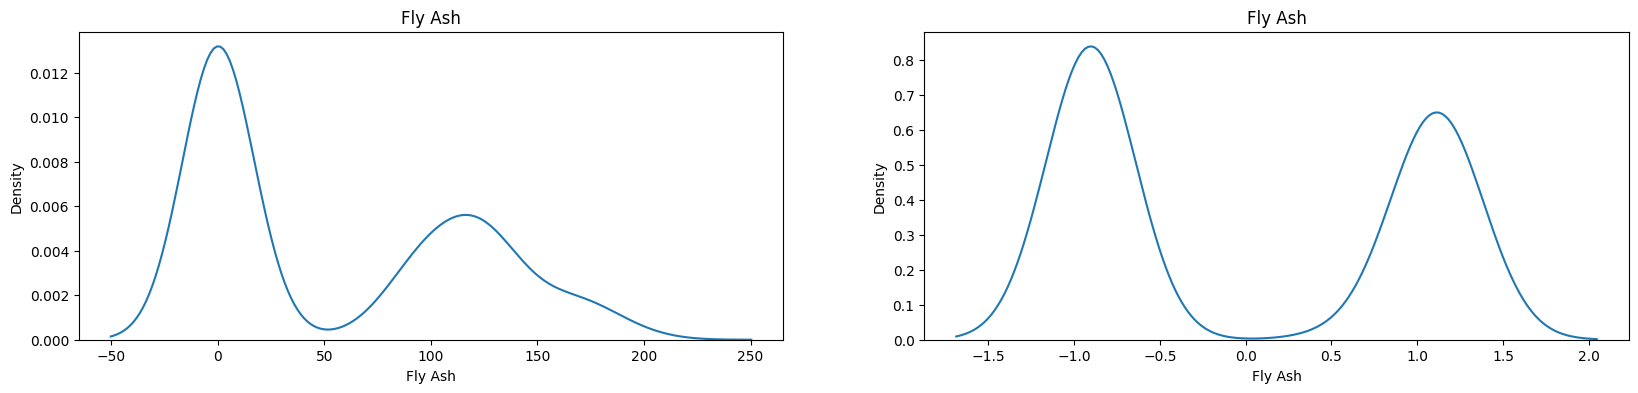

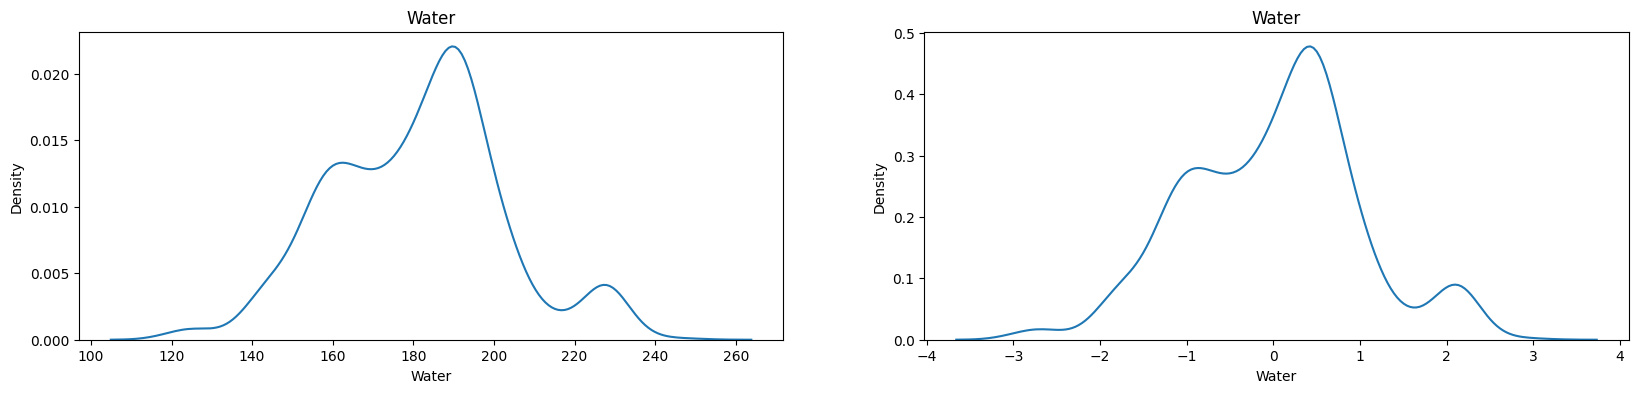

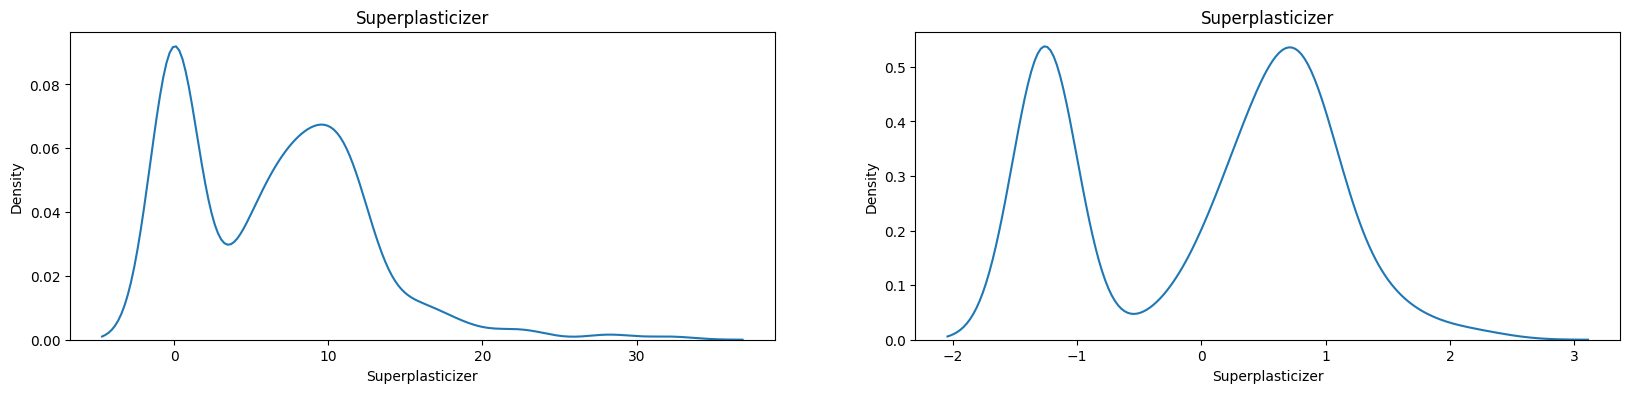

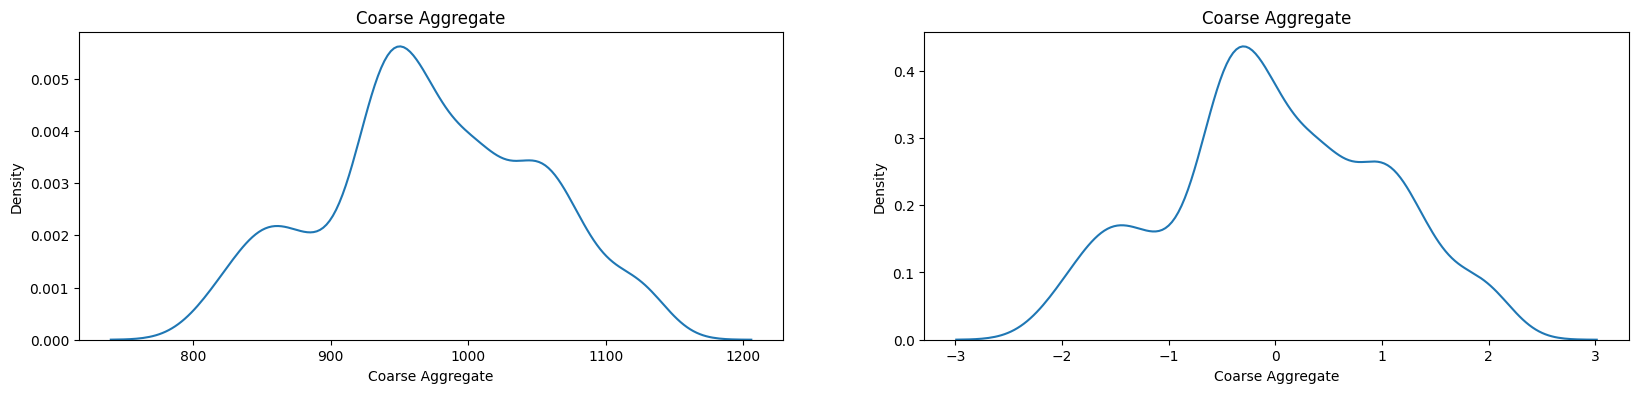

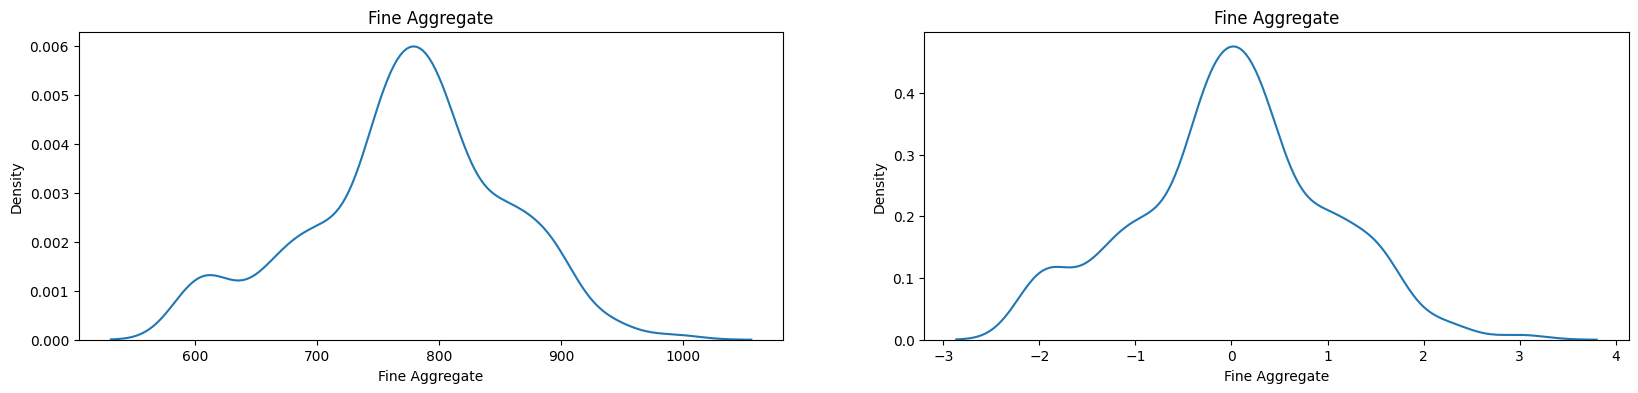

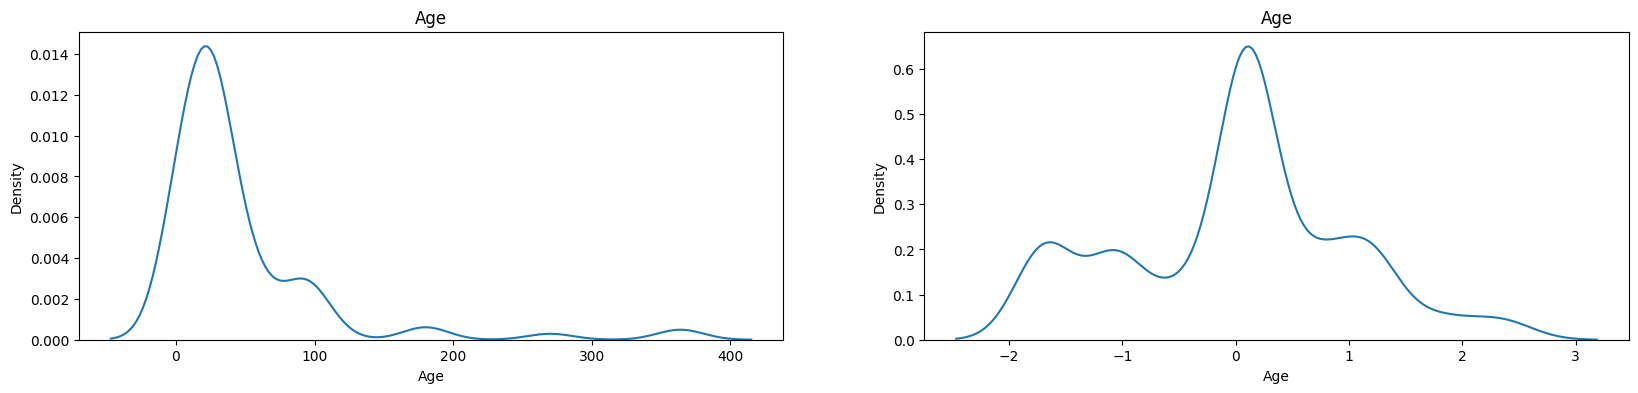

In [33]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)
for col in X_train_transformed2.columns:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()



In [38]:
pd.DataFrame({'cols' : X_train.columns , 'box-cox lamdas' : pt.lambdas_ , 'yeo-jhonson lamdas': pt1.lambdas_})

,cols,box-cox lamdas,yeo-jhonson lamdas
0,Cement,0.172271,0.050069
1,Blast Furnace Slag,0.028052,-0.028851
2,Fly Ash,-0.037072,-0.140310
3,Water,0.809568,1.038942
4,Superplasticizer,0.114979,0.099450
5,Coarse Aggregate,1.129168,1.306483
6,Fine Aggregate,1.829625,1.956172
7,Age,0.048975,0.002944
